#Set-Up

In [ ]:
#Copy-and-paste the code below to use as "set-up" when your optimization model uses Pyomo and Coin-OR solvers.
#for reference, see https://jckantor.github.io/ND-Pyomo-Cookbook/notebooks/01.02-Running-Pyomo-on-Google-Colab.html#installing-pyomo-and-solvers

%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

from pyomo.environ import *

#Simple Model Visual Intuition
First, let's investigate a well-behaved minimization problem.

Find the minimum of the function $f(x) = x^2 - 2x + 5$

In [ ]:
def my_function(x):
  y = x**2 - 2*x + 5
  return y

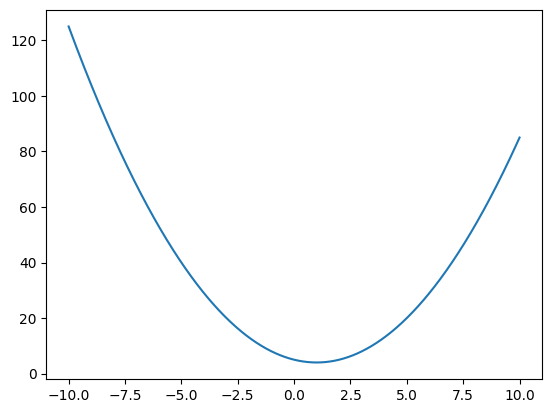

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)

y = [my_function(x[i]) for i in range(1000)]

plt.plot(x,y)

#Solve with Pyomo

In [ ]:
#initialize a "Concrete Model"
model = ConcreteModel()

In [ ]:
#initialize your DVs
model.x = Var(domain = Reals) #you can google "pyomo domain sets" for a list of several domains

In [ ]:
#define the objective function
model.obj = Objective(expr = model.x**2 - 2*model.x + 5, sense = minimize)

In [ ]:
#solve the model
opt = SolverFactory('ipopt') #ipopt is similar to GRGNonlinear in Excel
results = opt.solve(model, tee = False) #setting tee = False will hide the diagnostic output

In [ ]:
#print the solution
print("optimal x* = ", value(model.x))
print("optimal obj* = ", value(model.obj))

optimal x* =  1.0
optimal obj* =  4.0


#Solving with Objective as a Function


In [ ]:
def my_function(x):
  y = x**2 - 2*x + 5
  return y

In [ ]:
#initialize new model
model2 = ConcreteModel()

#declare DVs
model2.x = Var(domain = Reals)

#define objective
model2.obj = Objective(expr = my_function(model2.x), sense = minimize)

model2.pprint()

1 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : x**2 - 2*x + 5

2 Declarations: x obj


In [ ]:
#solve model2
opt = SolverFactory('ipopt') #ipopt is similar to GRGNonlinear in Excel
results = opt.solve(model2, tee = True) #setting tee = False will hide the diagnostic output

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

In [ ]:
#print the solution
print("optimal x* = ", value(model2.x))
print("optimal obj* = ", value(model2.obj))

optimal x* =  1.0
optimal obj* =  4.0
